In [10]:
# 2軸へ角速度指令 434.05 nm Calibration
import numpy as np
import pyautogui
import sys, time
import pandas as pd
import matplotlib.pyplot as plt
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 6950
  EndAngle =7000
  Resolution = 3
  DXL_SetGoalAngle(dev, TargetID1, StartAngle)
  time.sleep(2)
  i = 0
  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    DXL_SetGoalAngle(dev, TargetID1, i)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    time.sleep(0.5)

#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  
  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


1 XL430-W250
0 NONE


KeyboardInterrupt: 

In [1]:
# 2軸へ角速度指令
import numpy as np
import pyautogui
import sys, time
import pandas as pd
import matplotlib.pyplot as plt
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 6950
  EndAngle = 7000
  Resolution = 2.4
  DXL_SetGoalAngle(dev, TargetID1, StartAngle - 20)
  time.sleep(1)
  DXL_SetGoalAngle(dev, TargetID1, StartAngle)
  time.sleep(1)
  i = 0
  RepeatNum = 1
  dataX = []
  dataY = []

  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    Voltage = []
    AverageVoltage = []
    dataX.append(i) #x軸の値=角度
    DXL_SetGoalAngle(dev, TargetID1, i)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    time.sleep(0.5)
    for l in range(RepeatNum):
        pyautogui.click(140, 70)
        time.sleep(3)
        pyautogui.click(30, 70)
        time.sleep(1)
        pyautogui.click(800, 550)
        time.sleep(1.5)
        pyautogui.click(1100, 540)
        RawData = []
        RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt")
        Data = []
        Ave = []
        Ave = np.average(RawData)
        AverageVoltage.append(Ave)
    Voltage = sum(AverageVoltage) / len(AverageVoltage)
    dataY.append(Voltage) #y軸の値=強さ
    
  print(dataX)
  print(dataY)
  print(Voltage)
  
#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  
  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


Could not open COM port.


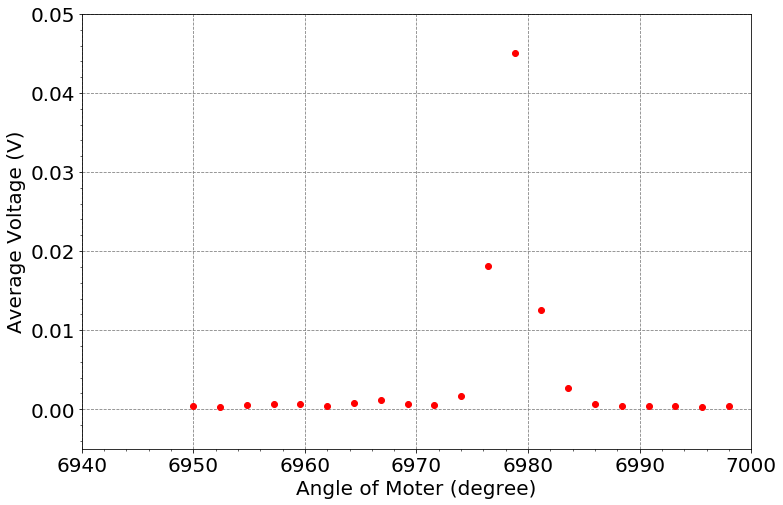

In [20]:
fig = plt.figure(figsize=(12, 8))
plt.plot(dataX, dataY, "ro", color="r",label="value1 of data01" )
#x = np.linspace()
#plt.xticks([0, 400, 800]) #目盛りの追加（データの番号）
plt.xticks(fontsize = 20) #軸目盛変更
plt.yticks(fontsize = 20) #軸目盛変更
#plt.xticks(np.arange(0, 1001, 125), np.arange(0, 80, 10)) #最後が表示されない？
#plt.yscale('log') #対数表示
plt.grid(color = "gray", linestyle="--") #()の中なしでも可
plt.minorticks_on() #補助目盛り
plt.xlim(6940, 7000)
plt.ylim(-0.005, 0.05) #軸の範囲
plt.xlabel("Angle of Moter (degree)",size = "xx-large", fontsize = 20)
plt.ylabel("Average Voltage (V)",size = "xx-large", fontsize = 20)
#plt.legend(loc="upper right") #ラベル位置指定
plt.show()
#plt.savefig("10ns.Harufa-py.jpg") #カレントフォルダに保存

In [ ]:
#12/13 17;00  0.01nm download6
[6950.0, 6952.4, 6954.799999999999, 6957.199999999999, 6959.5999999999985, 6961.999999999998, 6964.399999999998, 6966.799999999997, 6969.199999999997, 6971.599999999997, 6973.999999999996, 6976.399999999996, 6978.799999999996, 6981.199999999995, 6983.599999999995, 6985.9999999999945, 6988.399999999994, 6990.799999999994, 6993.199999999993, 6995.599999999993, 6997.999999999993]
[array([0.00058471]), array([0.00030033]), array([0.00034376]), array([0.00037314]), array([0.00078098]), array([0.00082254]), array([0.0009463]), array([0.0012135]), array([0.00144914]), array([0.00123195]), array([0.00185229]), array([0.01729296]), array([0.04662464]), array([0.01507624]), array([0.00221577]), array([0.00044719]), array([0.00044719]), array([0.00040813]), array([0.00033157]), array([0.00038281]), array([0.00034094])]
[0.00034094]

In [ ]:
#12/13 17;07  0.01nm download7
[6950.0, 6952.4, 6954.799999999999, 6957.199999999999, 6959.5999999999985, 6961.999999999998, 6964.399999999998, 6966.799999999997, 6969.199999999997, 6971.599999999997, 6973.999999999996, 6976.399999999996, 6978.799999999996, 6981.199999999995, 6983.599999999995, 6985.9999999999945, 6988.399999999994, 6990.799999999994, 6993.199999999993, 6995.599999999993, 6997.999999999993]
[array([0.00046657]), array([0.00033844]), array([0.00050002]), array([0.00064534]), array([0.00070472]), array([0.00042313]), array([0.00077536]), array([0.00118506]), array([0.00072409]), array([0.00053628]), array([0.00161885]), array([0.01806639]), array([0.0450937]), array([0.01252297]), array([0.00264768]), array([0.00065284]), array([0.00042063]), array([0.00039438]), array([0.00036]), array([0.00033907]), array([0.00036657])]
[0.00036657]